---
# Coursera Capstone Project

## Battle of Neighborhoods (Final Week)
---
---


## Importing Libraries

In [10]:
# Set up import statements for all of the packages that plan to use.

import numpy as np
import pandas as pd
import random # library for random number generation
import os
import folium 
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge folium=0.5.0 --yes

print('Libraries imported.')


Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## Table of Content

### 1. Report Section

#### 1.1 Introduction

Introduction where I will discuss the business problem and who would be interested in this project.

#### 1.2 Data Section

I will be describing the data that will be used to solve the problem and the source of the data.

#### 1.3 Methodology Section

Methodology section which represents the main component of the report.

#### 1.4 Results Section

The results made out of the report.

#### 1.5 Discussion Section

Discussion section where I will discuss any observations noted and any recommendations made based on the results.

#### 1.6 Conclusion  Section

Conclusion section with the over all concept


### 2. Project Section

The section where I will be developing the whole project steps made 


---
---
# Report Section
---

## 1. Introduction

###        Introducing the problem and the project aim 

I am a person who will move temporarily by New Cairo Compounds in Egypt and I am willing to serach for the top venues nearby such as Cafes, restaurants, shopping malls and sporting clubs.


This project is giving me the opportunity to seach out for these resources smarter and faster. Which gives me an easier methodology to reach out the proper distination whithout paying too much effort and time walking through roads searching for the ultimate destination.

The interested audience might be the people willing to move by the side and needs to live by certain utilities.

Limiting up my project research for the top 200 venus.


## 2. Data Section 

###        Data desciption which are collected from the foursquare Api

The data is required to provide adequate information about the Cafes, Restaurants, Shopping malls and sporting clubs.

The data should help me decide where to rent my appartment with good pricing.

The data should help me make the most use out of my time with the top areas to visit and meet by.


### Data Usage 

1. Using the geolocator to locate New Cairo Address 

2. get address longitute and latitudes

3. Use the four square Api with the Client ID and Version to find out the list of venues around a radius area. 

## 3. Methodology:

The Methodology section represents the main component of the report where I will discuss and describe how will we be exploring data, and the statistics made out of these data.

The Analysis methodology is to map New Cairo's Data to allow proper classification of data from the geographic perspective. classification is based on type of venue and how well they are distributed

After Gathering all the Neighborhoods we will classify them based on their category.

We will find out that restaurants category is very diverse and unique. On the other hand, we will find out that the coffee shops, malls, and supermarkets are unique utilities that are available around.

we will then perform onhot encoding for all categories and get their mean values and then perform KNN algorithm to differentiate between then and get the best results out of it. 

The best result is set to be the cluster that has variety of utilities and neighbors that lets people get the most fun out of the district/ area and have earsier stay to not move alot to get to a certain area. 


## 4. Results Section:

There are 5 clusters  created each cluster contains a variety of services around the best cluster is set to be the first one in the notebook.

This Cluster has various rows because it is the cluster that contains the more neighbors than the others. 

The other Clusters has Neighbors thar are around the save area in New Cairo.

## 5. Discussion Section:

Living by the area where more utilities and services are around gives a better feeling for which every thing is accessable and easy for a person that can move by as a new resident


## 6. Conclusion Section: 

The Whole project and course Content starting from the very beginning until the very end is a very useful experience that helped me figure out more and learn out of the whole experience.

This project has enabled me to perform real practical skills for prediction analytics.

---
---
# Project Section
---

## Getting the address and the location geographic location

In [2]:

address = 'New Cairo, Egypt'

geolocator = Nominatim(user_agent="nd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Egypt home are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Egypt home are 30.019262949999998, 31.503642836148114.


In [3]:

neighborhood_latitude=latitude
neighborhood_longitude=longitude

## Pushing the Foursquare Credentials

In [120]:

CLIENT_ID = '02CM01U2QJ0KL0REJWOXTYRC3CUEKRKABLSVE2304GPHO1DS' # your Foursquare ID


CLIENT_SECRET = 'RXYYM1GFQXST4HYZL50GAKGSLO2SU04SORWTWV2CMOCL2ELD' # your Foursquare Secret


VERSION = '20180605' # Foursquare API version

## Limiting the area and venues relative to the foursquare locations


In [228]:
def get_venues(lat,lng):
    LIMIT = 200 # limit of number of venues returned by Foursquare API
    radius = 5000 # define radius

    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude, 
        radius, 
        LIMIT)
    url # display URL
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass

    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    print("done")
    return df

In [229]:
df

,ID,Name,Category
0,56229ea3498e6aeb7dc1cf77,Starbucks (ستاربكس),Coffee Shop
1,55aba60c498e57df03ddd845,Point 90 Cinemas,Multiplex
2,57f91e60498e0e907a965499,Espresso Lab,Coffee Shop
3,55aacda1498e0ce436da1bb6,Point 90,Shopping Mall
4,5c9dde4073fe25002cf9cbd2,Desoky & Soda,Restaurant
...,...,...,...
95,57853310cd10cc5e3dcfdbd1,Maxim Mall,Shopping Mall
96,54418462498edb7d01f15d50,Les Amis,Café
97,58b853fd13af1c0df9c79f02,Tao,Chinese Restaurant
98,4eef520677c82b92fa1d7d09,El Dahan Grill (الدهان),Kebab Restaurant


In [127]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Displaying the Neighbors around the area

In [153]:
venues = results['response']['groups'][0]['items']
    
NDnearby_venues = pd.json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
NDnearby_venues =NDnearby_venues.loc[:, filtered_columns]

# filter the category for each row
NDnearby_venues['venue.categories'] = NDnearby_venues.apply(get_category_type, axis=1)
#NDnearby_venues.index.names = ['ID']

# clean columns
NDnearby_venues.columns = [col.split(".")[-1] for col in NDnearby_venues.columns]
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(NDnearby_venues)
    


,name,categories,lat,lng
0,Starbucks (ستاربكس),Coffee Shop,30.020782,31.495130
1,Point 90 Cinemas,Multiplex,30.020216,31.494624
2,Espresso Lab,Coffee Shop,30.020924,31.494965
3,Point 90,Shopping Mall,30.020339,31.494701
4,Desoky & Soda,Restaurant,30.020494,31.495544
5,Oscar Grand Stores (أوسكار),Supermarket,30.027684,31.488903
6,Paul - Maison de Qualité,French Restaurant,30.021033,31.495111
7,Hedeya Mega Store,Gift Shop,30.025369,31.485559
8,Gold's Gym,Gym / Fitness Center,30.025209,31.484114
9,Asmak,Seafood Restaurant,30.025087,31.484779


In [96]:
print('{} venues were returned by Foursquare.'.format(NDnearby_venues.shape[0]))

100 venues were returned by Foursquare.


### Displaying Neighbors in Map

In [70]:

map_nd = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(NDnearby_venues['lat'], NDnearby_venues['lng'], NDnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=4,
        radius=10,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_nd)  
    
map_nd

### filtering Data for Restaurants

In [71]:
#Restaurant_data = NDnearby_venues[NDnearby_venues['categories'].isin(['Restaurant', 'Kebab Restaurant', 'Falafel Restaurant'])].reset_index(drop=True)
Restaurant_data = NDnearby_venues[NDnearby_venues['categories'].str.contains('Restaurant')].reset_index(drop=True)

Restaurant_data


,name,categories,lat,lng
0,Desoky & Soda,Restaurant,30.020494,31.495544
1,Paul - Maison de Qualité,French Restaurant,30.021033,31.495111
2,Asmak,Seafood Restaurant,30.025087,31.484779
3,Bocca Eatery & Social House,Italian Restaurant,30.029087,31.482789
4,Fuddruckers,American Restaurant,30.025090,31.480620
5,Casper & Gambini's,Italian Restaurant,30.020640,31.495478
6,Marzipan,Mediterranean Restaurant,30.029129,31.483519
7,Dar Ward,Syrian Restaurant,30.024971,31.490094
8,Tamara Elna,Lebanese Restaurant,30.020302,31.495537
9,Tavola,Restaurant,30.025216,31.483558


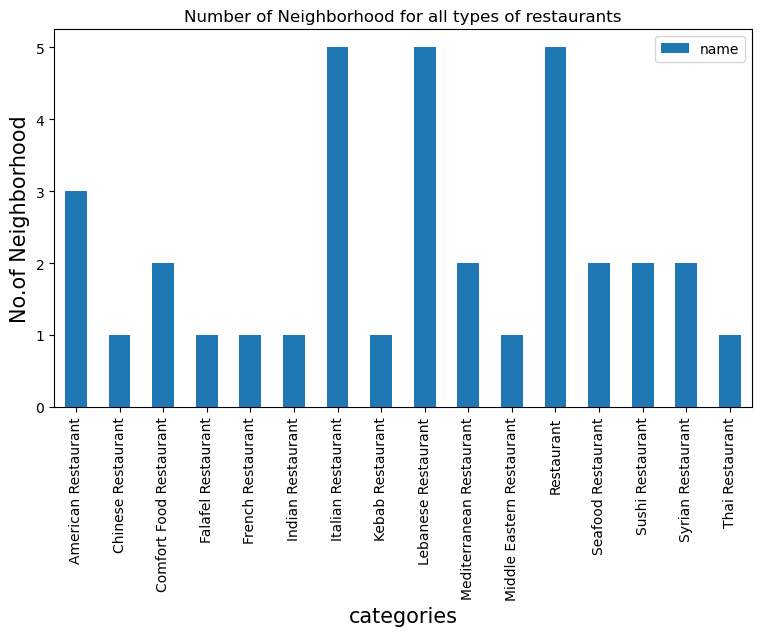

In [147]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for all types of restaurants')
#On x-axis
plt.xlabel('Categories', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
Restaurant_data.groupby('categories')['name'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


## Utilities Combination Between Coffee Shops, Shopping Malls and Supermarkets

In [151]:
Coffee_data = NDnearby_venues[NDnearby_venues['categories'].isin(['Coffee Shop','Café','Shopping Mall','Supermarket'])  ].reset_index(drop=True)
Coffee_data

,name,categories,lat,lng
0,Starbucks (ستاربكس),Coffee Shop,30.020782,31.495130
1,Espresso Lab,Coffee Shop,30.020924,31.494965
2,Point 90,Shopping Mall,30.020339,31.494701
3,Oscar Grand Stores (أوسكار),Supermarket,30.027684,31.488903
4,Concord Plaza (كونكورد بلازا),Shopping Mall,30.025224,31.483482
5,Boulevard,Café,30.020726,31.494412
6,The Spot Mall,Shopping Mall,30.015000,31.499757
7,Caribou Coffee,Coffee Shop,30.025056,31.483385
8,Seoudi (سعودي),Supermarket,30.040625,31.475314
9,Aroma Lounge,Café,30.020962,31.494982


In [89]:
shopping_data = NDnearby_venues[NDnearby_venues['categories'].str.contains('Mall')].reset_index(drop=True)

shopping_data


,NAME,categories,lat,lng
0,Point 90,Shopping Mall,30.020339,31.494701
1,Concord Plaza (كونكورد بلازا),Shopping Mall,30.025224,31.483482
2,The Spot Mall,Shopping Mall,30.015000,31.499757
3,The WaterWay,Shopping Mall,30.041309,31.475315
4,City Square,Shopping Mall,30.054695,31.492283
5,Maxim Mall,Shopping Mall,30.029179,31.496609


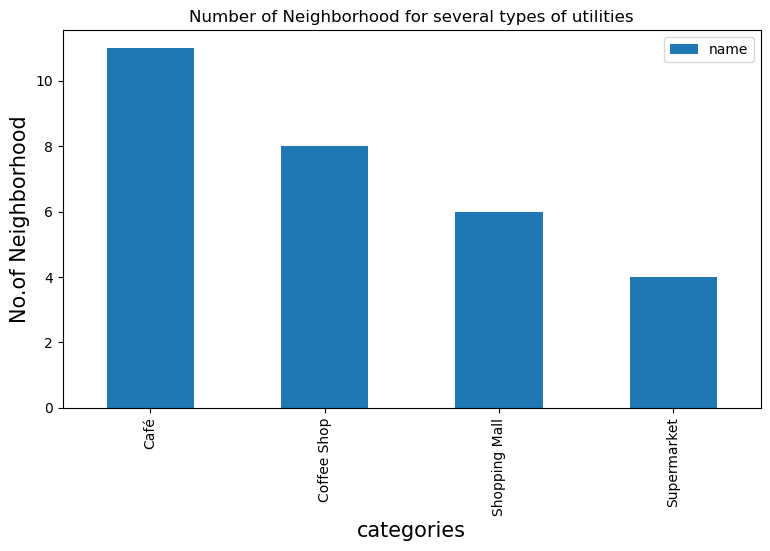

In [230]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for several types of utilities')
#On x-axis
plt.xlabel('Categories', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
Coffee_data.groupby('categories')['name'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### Performing One-Hot Enconding on all Categories then taking the Average Mean

In [231]:
# one hot encoding
category_onehot = pd.get_dummies(NDnearby_venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
category_onehot['categories'] = NDnearby_venues['categories'] 

# move neighborhood column to the first column
fixed_columns = [category_onehot.columns[-1]] + list(category_onehot.columns[:-1])
category_onehot = category_onehot[fixed_columns]

category_onehot

,categories,American Restaurant,Bakery,Bar,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,...,Restaurant,Seafood Restaurant,Shopping Mall,Spa,Sports Club,Supermarket,Sushi Restaurant,Syrian Restaurant,Thai Restaurant,Theme Park Ride / Attraction
0,Coffee Shop,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Multiplex,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Coffee Shop,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Shopping Mall,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Restaurant,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Shopping Mall,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
96,Café,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,Chinese Restaurant,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
98,Kebab Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
category_onehot.shape

(100, 46)

In [233]:
category_grouped = category_onehot.groupby('categories').mean().reset_index()
category_grouped

,categories,American Restaurant,Bakery,Bar,Breakfast Spot,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Comfort Food Restaurant,...,Restaurant,Seafood Restaurant,Shopping Mall,Spa,Sports Club,Supermarket,Sushi Restaurant,Syrian Restaurant,Thai Restaurant,Theme Park Ride / Attraction
0,American Restaurant,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bakery,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bar,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Breakfast Spot,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Burger Joint,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Café,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Chinese Restaurant,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Coffee Shop,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,Comfort Food Restaurant,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Convenience Store,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
category_grouped.shape

(45, 46)

### Category Grouping

In [196]:
num_top_venues = 5

for hood in category_grouped['categories']:
    print("----"+hood+"----")
    temp = category_grouped[category_grouped['categories'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----American Restaurant----
                 venue  freq
0  American Restaurant   1.0
1                Hotel   0.0
2    Indian Restaurant   0.0
3   Italian Restaurant   0.0
4            Juice Bar   0.0


----Bakery----
                venue  freq
0              Bakery   1.0
1         Pizza Place   0.0
2      Ice Cream Shop   0.0
3   Indian Restaurant   0.0
4  Italian Restaurant   0.0


----Bar----
                 venue  freq
0                  Bar   1.0
1  American Restaurant   0.0
2               Resort   0.0
3    Indian Restaurant   0.0
4   Italian Restaurant   0.0


----Breakfast Spot----
                 venue  freq
0       Breakfast Spot   1.0
1  American Restaurant   0.0
2               Resort   0.0
3    Indian Restaurant   0.0
4   Italian Restaurant   0.0


----Burger Joint----
                 venue  freq
0         Burger Joint   1.0
1  American Restaurant   0.0
2               Resort   0.0
3    Indian Restaurant   0.0
4   Italian Restaurant   0.0


----Café----
              

In [197]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [207]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['categories']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['categories'] = category_grouped['categories']

for ind in np.arange(category_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(category_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,American Restaurant,American Restaurant,Gym / Fitness Center,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant,Escape Room
1,Bakery,Bakery,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
2,Bar,Bar,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
3,Breakfast Spot,Breakfast Spot,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
4,Burger Joint,Burger Joint,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant


In [216]:
# set number of clusters
kclusters = 5

category_grouped_clustering = category_grouped.drop('categories', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(category_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 0])

In [219]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

category_merged = NDnearby_venues

category_merged = category_merged.join(neighborhoods_venues_sorted.set_index('categories'), on='categories')

category_merged.head() # check the last columns!

,name,categories,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Starbucks (ستاربكس),Coffee Shop,30.020782,31.495130,0,Coffee Shop,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
1,Point 90 Cinemas,Multiplex,30.020216,31.494624,0,Multiplex,Theme Park Ride / Attraction,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant,Escape Room
2,Espresso Lab,Coffee Shop,30.020924,31.494965,0,Coffee Shop,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
3,Point 90,Shopping Mall,30.020339,31.494701,0,Shopping Mall,Theme Park Ride / Attraction,Dessert Shop,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
4,Desoky & Soda,Restaurant,30.020494,31.495544,0,Restaurant,Theme Park Ride / Attraction,Dessert Shop,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant


In [220]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(category_merged['lat'], category_merged['lng'], category_merged['categories'], category_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [221]:
category_merged.loc[category_merged['Cluster Labels'] == 0, category_merged.columns[[1] + list(range(5, category_merged.shape[1]))]]

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Coffee Shop,Coffee Shop,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
1,Multiplex,Multiplex,Theme Park Ride / Attraction,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant,Escape Room
2,Coffee Shop,Coffee Shop,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
3,Shopping Mall,Shopping Mall,Theme Park Ride / Attraction,Dessert Shop,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
4,Restaurant,Restaurant,Theme Park Ride / Attraction,Dessert Shop,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
95,Shopping Mall,Shopping Mall,Theme Park Ride / Attraction,Dessert Shop,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
96,Café,Café,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
97,Chinese Restaurant,Chinese Restaurant,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
98,Kebab Restaurant,Kebab Restaurant,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant


In [222]:
category_merged.loc[category_merged['Cluster Labels'] == 1, category_merged.columns[[1] + list(range(5, category_merged.shape[1]))]]

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
67,Spa,Spa,Theme Park Ride / Attraction,Dessert Shop,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant


In [223]:
category_merged.loc[category_merged['Cluster Labels'] == 2, category_merged.columns[[1] + list(range(5, category_merged.shape[1]))]]

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Furniture / Home Store,Furniture / Home Store,Theme Park Ride / Attraction,Gym / Fitness Center,Gift Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant,Escape Room


In [224]:
category_merged.loc[category_merged['Cluster Labels'] == 3, category_merged.columns[[1] + list(range(5, category_merged.shape[1]))]]

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Breakfast Spot,Breakfast Spot,Theme Park Ride / Attraction,Entertainment Service,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant


In [235]:
category_merged.loc[category_merged['Cluster Labels'] == 4, category_merged.columns[[1] + list(range(5, category_merged.shape[1]))]]

,categories,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Resort,Resort,Theme Park Ride / Attraction,Dessert Shop,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant
49,Resort,Resort,Theme Park Ride / Attraction,Dessert Shop,Gift Shop,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Falafel Restaurant


# Thank You.